In [137]:
import numpy as np
import pandas as pd

In [138]:
df=pd.read_csv(r'C:\Users\Tanisha Gandhi\PROJECTS\MACHINE LEARNING\Laptop Price Predictor\laptop_data.csv')

#**Data Cleaning**

In [139]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [140]:
df.shape

(1303, 12)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [142]:
#checking for duplicate rows as it can affect our model
df.duplicated().sum()

0

In [143]:
#checking for missing values
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [144]:
#droping 'Unnamed: 0' column as it is of no use
df.drop(columns=['Unnamed: 0'],inplace=True)

In [145]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [146]:
#removing "GB" from Ram column
#removing "kg" from Weight column
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [147]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [148]:
#converting the datatype of Ram and Weight from object to int32,float32 respectively
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


#**EDA**

In [150]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Tanisha Gandhi\AppData\Local\Temp\ipykernel_26500\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

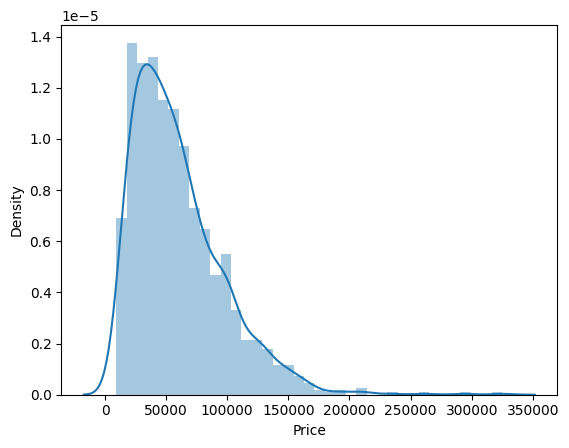

In [152]:
sns.distplot(df['Price'])

we can conclude from above that the data is a bit skewed

<Axes: xlabel='Company'>

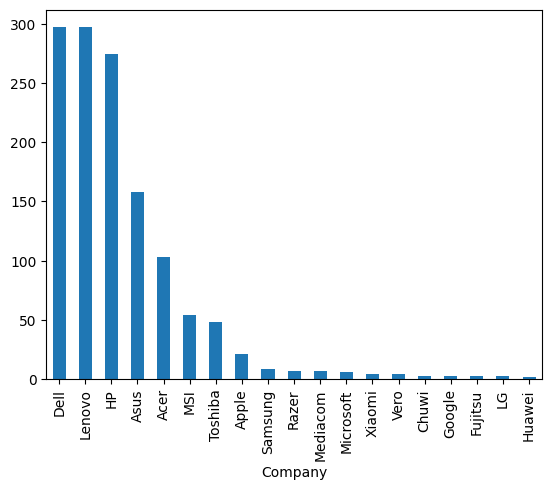

In [153]:
df['Company'].value_counts().plot(kind='bar')

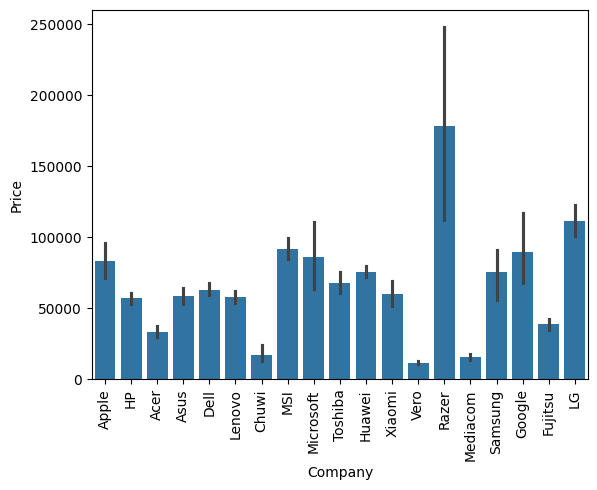

In [154]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()
#plt.xticks(rotation='vertical') is used to rotate the x-axis tick labels vertically.
#This is helpful when you have a lot of categories on the x-axis

from the above graphs we can say that on an average the price of Razer laptops are the very high

thus we can say that the Company name affects the Price

<Axes: xlabel='TypeName'>

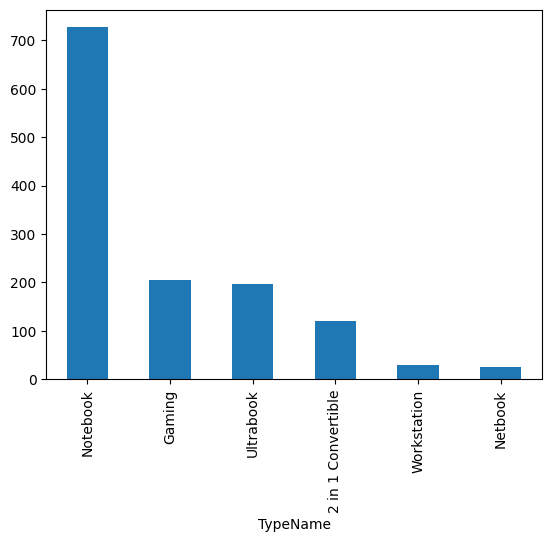

In [155]:
df['TypeName'].value_counts().plot(kind='bar')

from above we can say that Notebooks are sold the most

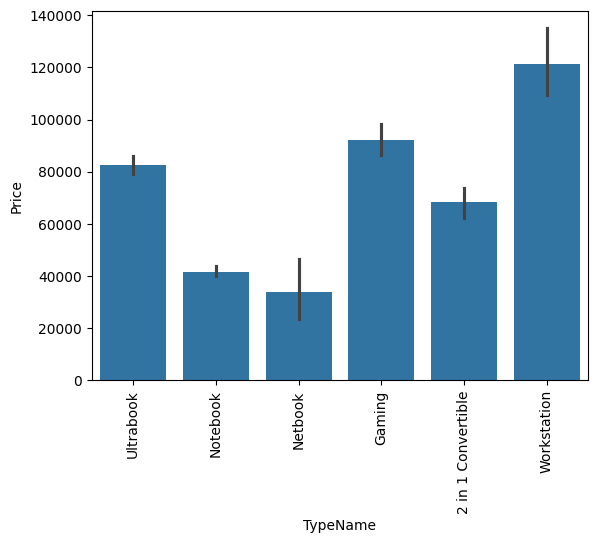

In [156]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

from the above graph we can say that the average price Of Workstation is the highest

C:\Users\Tanisha Gandhi\AppData\Local\Temp\ipykernel_26500\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

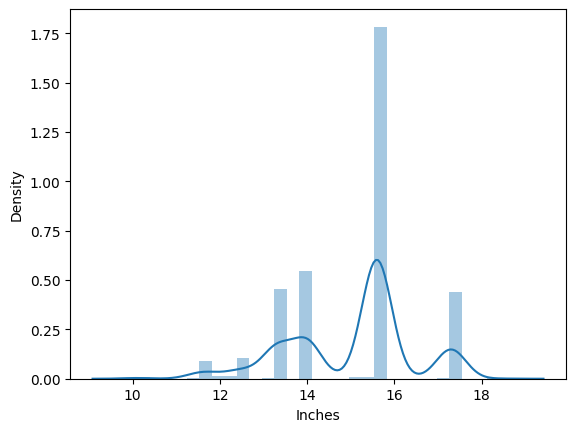

In [157]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

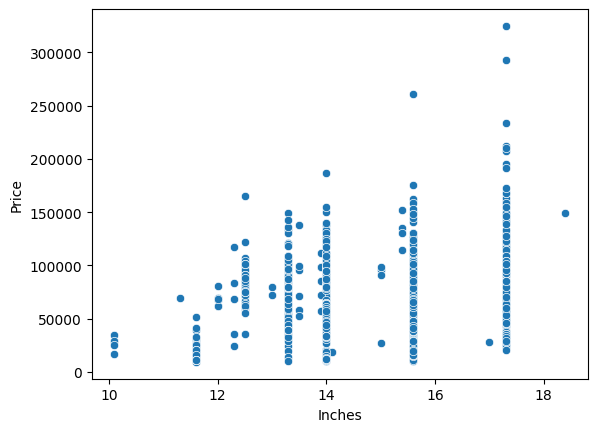

In [158]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [159]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

we can say information given in ScreenResolution column is not given in a consistent format

In [160]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [161]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
854,Asus,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce GTX 930MX,Windows 10,2.30,41931.36,0
181,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.23,74538.72,0
693,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.42,137995.20,1
412,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon 520,Windows 10,2.10,24988.32,0
658,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960,Windows 10,3.31,63722.88,0
58,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.43,130482.72,0
337,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.84,60952.32,0
923,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,16,256GB SSD,Nvidia GeForce 930M,Windows 10,2.40,105228.00,0
613,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel HD Graphics 520,Linux,2.25,19127.52,0
776,Lenovo,Notebook,15.6,4K Ultra HD 3840x2160,Intel Core i7 6820HQ 2.7GHz,16,512GB SSD,Nvidia Quadro M2000M,Windows 7,2.50,126273.60,0


<Axes: xlabel='Touchscreen'>

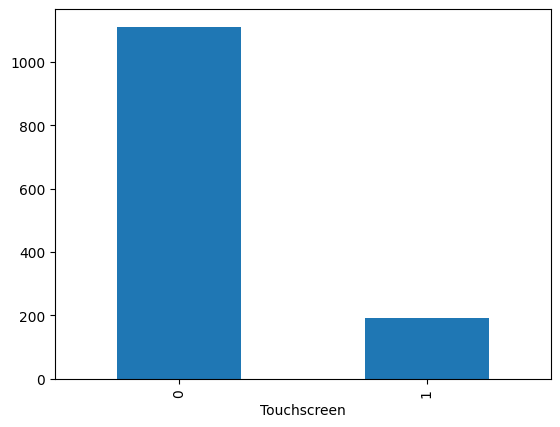

In [162]:
df['Touchscreen'].value_counts().plot(kind='bar')

touchscreen laptops are less comparitively

<Axes: xlabel='Touchscreen', ylabel='Price'>

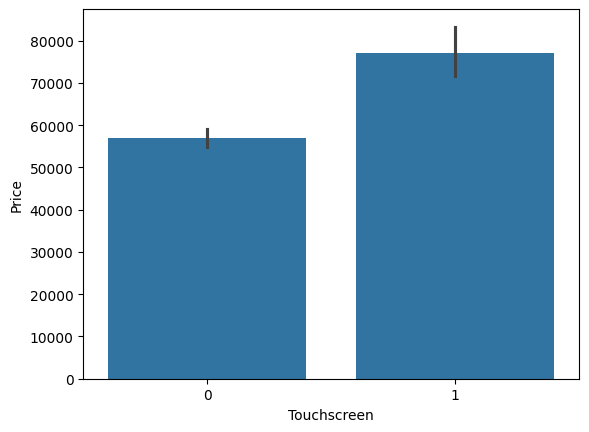

In [163]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [164]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [165]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
1150,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel HD Graphics 520,No OS,1.900,18061.9200,0,0
73,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.700,58341.6000,0,0
1213,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.191,53226.7200,1,1
392,Acer,Notebook,15.6,IPS Panel 1366x768,Intel Core i5 8250U 1.6GHz,12,1TB HDD,Nvidia GeForce MX130,Windows 10,2.200,36975.7872,0,1
319,Acer,Notebook,11.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,128GB Flash Storage,Intel HD Graphics 405,Windows 10,1.400,25840.8000,0,0


<Axes: xlabel='Ips'>

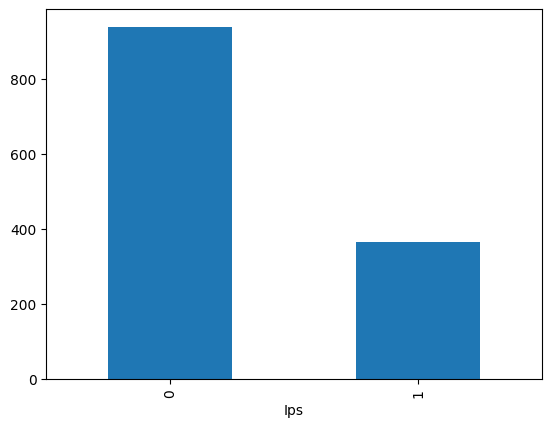

In [166]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

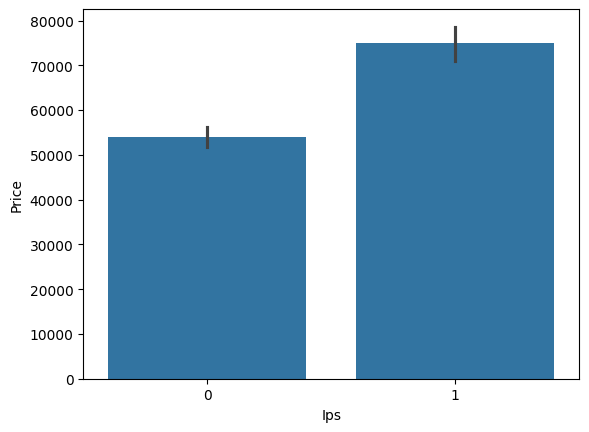

In [167]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [168]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [169]:
df['X_res']=new[0]
df['Y_res']=new[1]

In [170]:
df.sample(7)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
1156,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,79536.3840,0,0,Full HD 1920,1080
105,HP,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.58,35111.5200,0,1,IPS Panel Full HD 1920,1080
378,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,15238.0800,0,0,1366,768
635,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,1.99,48304.7136,0,0,Full HD 1920,1080
879,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.04,44701.9200,0,0,Full HD 1920,1080
809,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Nvidia GeForce 920M,Windows 10,2.40,32447.5200,0,0,Full HD 1920,1080
707,Lenovo,Workstation,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Nvidia Quadro M520M,Windows 7,2.18,98834.4000,0,0,Full HD 1920,1080


In [171]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
#lambda function is used to remove the content from string

In [172]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [174]:
#converting data type of X_res and Y_res from object to int
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [176]:
numeric_columns = df.select_dtypes(include=['float64', 'float32', 'int32', 'int64']).columns
correlation_with_price = df[numeric_columns].corr()['Price']
print(correlation_with_price)

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64


In [177]:
df['ppi']=(((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [178]:
numeric_columns = df.select_dtypes(include=['float64', 'float32', 'int32', 'int64']).columns
correlation_with_price = df[numeric_columns].corr()['Price']
print(correlation_with_price)

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64


In [179]:
df.drop(columns=['ScreenResolution'],inplace=True)
#dropping Screen Resolution column as it is of no use now

In [180]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [181]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)
#dropping these columns as we have already created ppi column which is a combination of these columns

In [182]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [183]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [184]:
df['Cpu name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
#lambda function is used to extract first 3 words from Cpu column

In [185]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [186]:
def fetch_processor(text):
    if text=='Intel Core i7' or text== 'Intel Core i5' or text== 'Intel Core i3':
        return text
    else:
        if(text.split()[0])=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [187]:
df['Cpu brand']= df['Cpu name'].apply(fetch_processor)

In [188]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

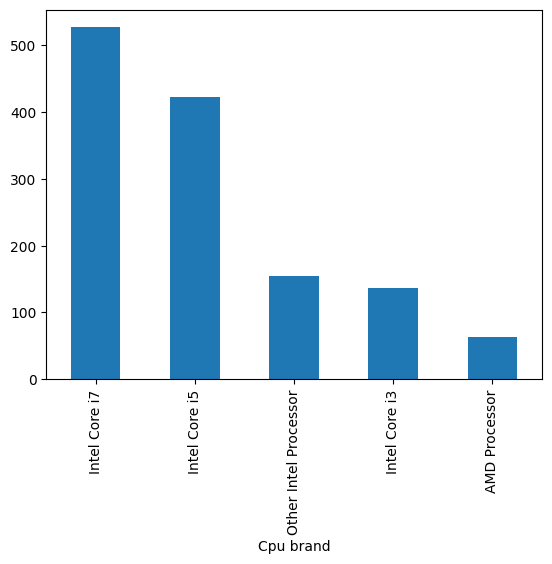

In [189]:
df['Cpu brand'].value_counts().plot(kind='bar')

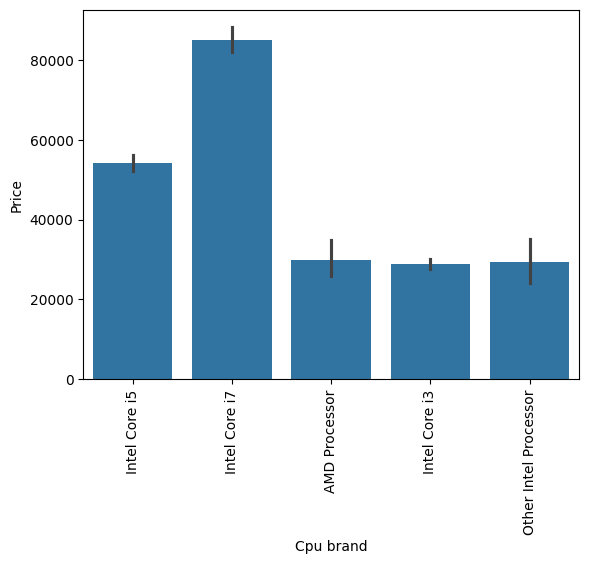

In [190]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [191]:
df.drop(columns=['Cpu','Cpu name'],inplace=True)

In [192]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

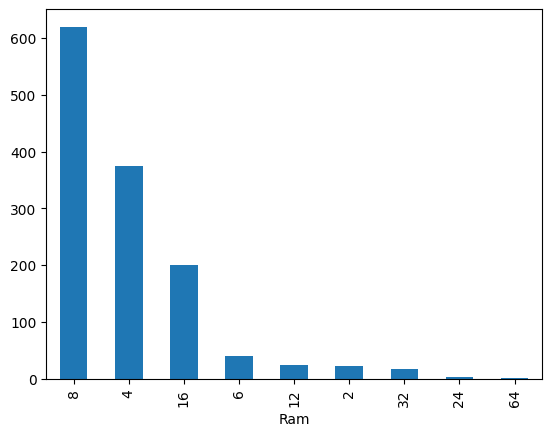

In [193]:
df['Ram'].value_counts().plot(kind='bar')

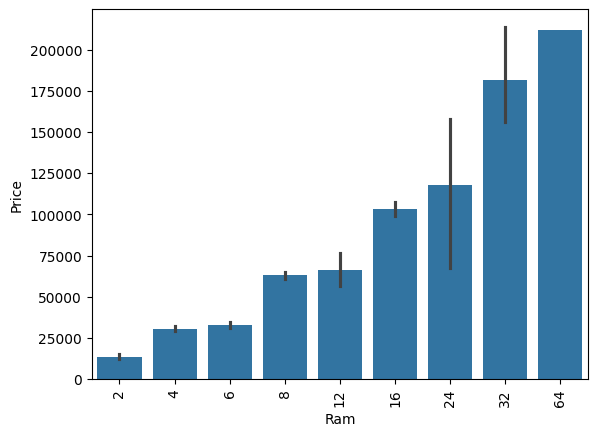

In [194]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

shows a almost linear relationship with price that is why Ram has very strong correlation with price

In [195]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

this column is very inconsistent hence can affect our analysis hence we will transform it now

In [196]:
def mem_assign(mem):
    if '+' in mem:
        new = mem.split(" +  ",1)
        new.append(0)
        new.append(0)
        if 'Hybrid' in new[1]:
            new[2]=new[1]
            new[1]=0
            return new
        elif 'SSD' in new[1]:
            s1 = int(new[0][0:3])
            s2 = int(new[1][0:3])
            s = s1+s2
            new[0] = (str(s)+"GB SSD")
            new[1] = 0
            return new
        elif 'HDD' in new[0]:
            s1 = int(new[0][0:1])
            s2 = int(new[1][0:1])
            s = s1+s2
            new[1] = (str(s)+"TB HDD")
            new[0] = 0
            return new
        elif 'Flash Storage' in new[0]:
            new[3] = new[0]
            new[0] = 0
            return new
        return new
    elif 'SSD' in mem:
        new = [mem,0,0,0]
        return new
    elif 'HDD' in mem:
        new = [0,mem,0,0]
        return new
    elif 'Hybrid' in mem:
        new = [0,0,mem,0]
        return new
    elif 'Flash Storage' in mem:
        new = [0,0,0,mem]
        return new

    
memlist = df['Memory'].apply(mem_assign)

print(type(memlist))
tempm = memlist.to_frame()
print(type(tempm))
tempm

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,Memory
0,"[128GB SSD, 0, 0, 0]"
1,"[0, 0, 0, 128GB Flash Storage]"
2,"[256GB SSD, 0, 0, 0]"
3,"[512GB SSD, 0, 0, 0]"
4,"[256GB SSD, 0, 0, 0]"
...,...
1298,"[128GB SSD, 0, 0, 0]"
1299,"[512GB SSD, 0, 0, 0]"
1300,"[0, 0, 0, 64GB Flash Storage]"
1301,"[0, 1TB HDD, 0, 0]"


In [197]:
m3 = pd.DataFrame(tempm['Memory'].tolist()).fillna('')
m3.sample(5)

,0,1,2,3
726,128GB SSD,1TB HDD,0,0
954,256GB SSD,0,0,0
583,256GB SSD,0,0,0
155,256GB SSD,0,0,0
226,0,1TB HDD,0,0


In [198]:
m3.rename(columns={0: 'SSD',1: 'HDD',2:'Hybrid',3:'Flash Storage'}, inplace=True)
m3.head()

,SSD,HDD,Hybrid,Flash Storage
0,128GB SSD,0,0,0
1,0,0,0,128GB Flash Storage
2,256GB SSD,0,0,0
3,512GB SSD,0,0,0
4,256GB SSD,0,0,0


In [199]:
m3['SSD'].value_counts()

SSD
256GB SSD     498
0             460
128GB SSD     172
512GB SSD     138
1TB SSD        16
32GB SSD        6
180GB SSD       5
16GB SSD        3
64GB SSD        1
1024GB SSD      1
768GB SSD       1
240GB SSD       1
8GB SSD         1
Name: count, dtype: int64

In [200]:
m3.head()

,SSD,HDD,Hybrid,Flash Storage
0,128GB SSD,0,0,0
1,0,0,0,128GB Flash Storage
2,256GB SSD,0,0,0
3,512GB SSD,0,0,0
4,256GB SSD,0,0,0


In [201]:
m3['SSD'] = m3['SSD'].str.replace('GB SSD','')

In [202]:
m3['SSD'] = m3['SSD'].str.replace('TB SSD','000')

In [203]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SSD            843 non-null    object
 1   HDD            1303 non-null   object
 2   Hybrid         1303 non-null   object
 3   Flash Storage  1303 non-null   object
dtypes: object(4)
memory usage: 40.8+ KB


In [204]:
m3['SSD'] = m3['SSD'].fillna(0).astype('int64')

In [205]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SSD            1303 non-null   int64 
 1   HDD            1303 non-null   object
 2   Hybrid         1303 non-null   object
 3   Flash Storage  1303 non-null   object
dtypes: int64(1), object(3)
memory usage: 40.8+ KB


In [206]:
m3['SSD'].value_counts()

SSD
256     498
0       460
128     172
512     138
1000     16
32        6
180       5
16        3
64        1
1024      1
768       1
240       1
8         1
Name: count, dtype: int64

In [207]:
m3['HDD'].value_counts()

HDD
0            727
1TB HDD      407
500GB HDD    134
2TB HDD       32
32GB HDD       1
128GB HDD      1
1.0TB HDD      1
Name: count, dtype: int64

In [208]:
m3['HDD'] = m3['HDD'].str.replace('GB HDD','')

In [209]:
m3['HDD'] = m3['HDD'].str.replace('1.0TB HDD','1TB HDD')

In [210]:
m3['HDD'] = m3['HDD'].str.replace('TB HDD','000')

In [211]:
m3['HDD'] = m3['HDD'].astype('Int32')

In [212]:
m3['HDD'].value_counts()

HDD
1000    408
500     134
2000     32
32        1
128       1
Name: count, dtype: Int64

In [213]:
m3['Hybrid'].value_counts()

Hybrid
0               1291
1.0TB Hybrid      11
508GB Hybrid       1
Name: count, dtype: int64

In [214]:
m3['Hybrid'] = m3['Hybrid'].str.replace('GB Hybrid','')
m3['Hybrid'] = m3['Hybrid'].str.replace('1.0TB Hybrid','1000')
m3['Hybrid'] = m3['Hybrid'].astype('Int32')
m3['Hybrid'].value_counts()

Hybrid
1000    11
508      1
Name: count, dtype: Int64

In [215]:
m3['Flash Storage'].value_counts()

Flash Storage
0                      1228
32GB Flash Storage       38
64GB Flash Storage       16
256GB Flash Storage       8
16GB Flash Storage        7
128GB Flash Storage       4
512GB Flash Storage       2
Name: count, dtype: int64

In [216]:
m3['Flash Storage'] = m3['Flash Storage'].str.replace('GB Flash Storage','')
m3['Flash Storage'] = m3['Flash Storage'].astype('Int32')
m3['Flash Storage'].value_counts()

Flash Storage
32     38
64     16
256     8
16      7
128     4
512     2
Name: count, dtype: Int64

In [217]:
m3

,SSD,HDD,Hybrid,Flash Storage
0,128,<NA>,<NA>,<NA>
1,0,<NA>,<NA>,128
2,256,<NA>,<NA>,<NA>
3,512,<NA>,<NA>,<NA>
4,256,<NA>,<NA>,<NA>
...,...,...,...,...
1298,128,<NA>,<NA>,<NA>
1299,512,<NA>,<NA>,<NA>
1300,0,<NA>,<NA>,64
1301,0,1000,<NA>,<NA>


In [218]:
m3.fillna(0, inplace=True)
m3

,SSD,HDD,Hybrid,Flash Storage
0,128,0,0,0
1,0,0,0,128
2,256,0,0,0
3,512,0,0,0
4,256,0,0,0
...,...,...,...,...
1298,128,0,0,0
1299,512,0,0,0
1300,0,0,0,64
1301,0,1000,0,0


In [219]:
df = df.join(m3)

In [220]:
df.drop(columns = ['Memory'],inplace = True)

In [221]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,SSD,HDD,Hybrid,Flash Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,0,0


In [222]:
numeric_columns = df.select_dtypes(include=['float64', 'float32', 'int32', 'int64']).columns
correlation_with_price = df[numeric_columns].corr()['Price']
print(correlation_with_price)

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
SSD              0.670799
HDD             -0.096441
Hybrid           0.007989
Flash Storage   -0.040511
Name: Price, dtype: float64


In [223]:
df.drop(columns = ['Hybrid','Flash Storage'],inplace = True)

In [224]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,SSD,HDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0


In [225]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [226]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [227]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,SSD,HDD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel


In [228]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

ARM category has only 1 row so it will be of no use hence we will drop it

In [229]:
df=df[df['Gpu brand']!='ARM']

In [230]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

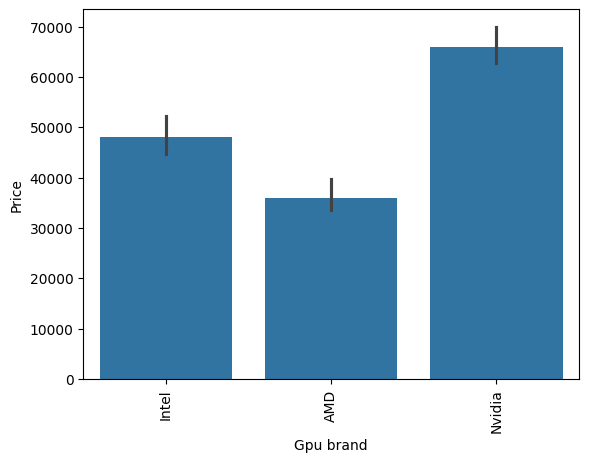

In [231]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [232]:
df.drop(columns=['Gpu'],inplace=True)

In [233]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,SSD,HDD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel


In [234]:

df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

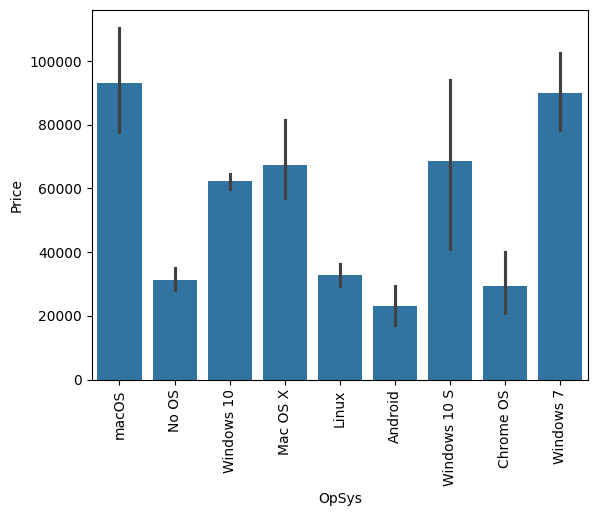

In [235]:

sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [236]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [237]:

df['os'] = df['OpSys'].apply(cat_os)

In [238]:

df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,SSD,HDD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel,Mac


In [239]:

df.drop(columns=['OpSys'],inplace=True)

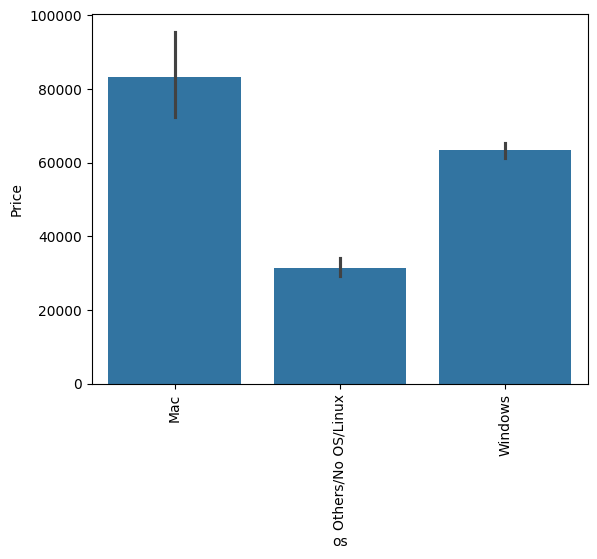

In [240]:

sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Tanisha Gandhi\AppData\Local\Temp\ipykernel_26500\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

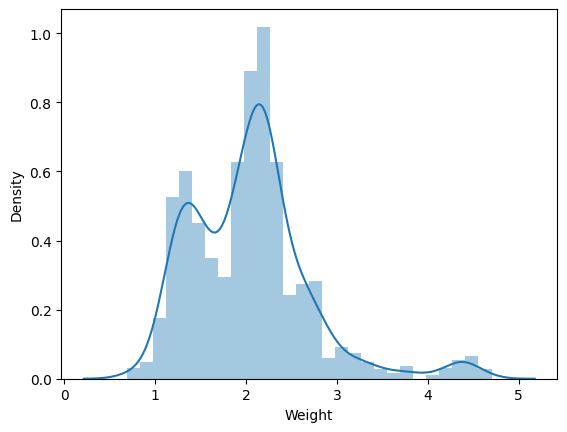

In [241]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

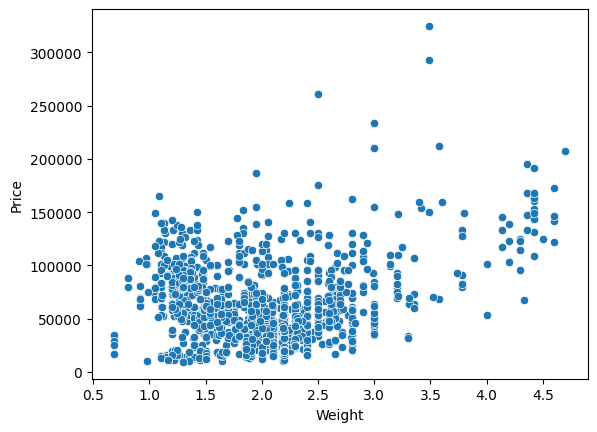

In [242]:

sns.scatterplot(x=df['Weight'],y=df['Price'])

In [243]:
numeric_columns = df.select_dtypes(include=['float64', 'float32', 'int32', 'int64']).columns
correlation_with_price = df[numeric_columns].corr()['Price']
print(correlation_with_price)

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
SSD            0.670660
HDD           -0.096891
Name: Price, dtype: float64


C:\Users\Tanisha Gandhi\AppData\Local\Temp\ipykernel_26500\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

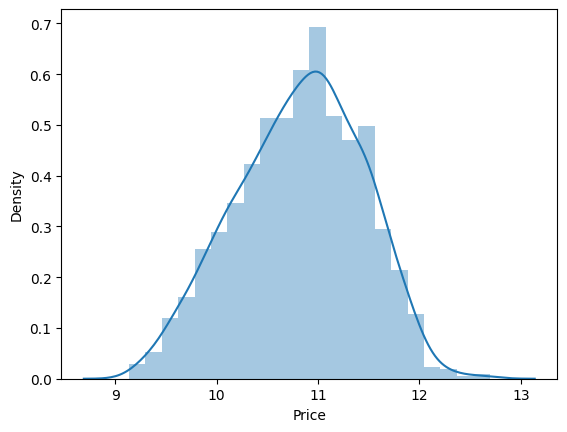

In [244]:
sns.distplot(np.log(df['Price']))

In [245]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [246]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,SSD,HDD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,256,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,128,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,512,0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,0,1000,AMD,Windows


In [247]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [248]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [249]:
import sklearn

In [250]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [251]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,SSD,HDD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,128,0,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,128,1000,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,0,1000,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,128,1000,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,0,500,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,512,0,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,0,1000,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,0,2000,Nvidia,Others/No OS/Linux


In [252]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [253]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Linear Regression

In [254]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

# Define the steps in the pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = LinearRegression()

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Assuming X_train, X_test, y_train, y_test are already defined
# Fit the pipeline
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Print evaluation metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))



R2 score: 0.8073277448418671
MAE: 0.21017827976428702


### Ridge Regression

In [255]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Example data (replace with your actual data)
# Assuming X_train, X_test, y_train, y_test are already defined
# X_train, X_test, y_train, y_test = ...

# Define the steps in the pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = Ridge(alpha=10)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Print evaluation metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8127331031311809
MAE: 0.20926802242582984


### Lasso Regression

In [256]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Example data (replace with your actual data)
# Assuming X_train, X_test, y_train, y_test are already defined
# X_train, X_test, y_train, y_test = ...

# Define the steps in the pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = Lasso(alpha=0.001)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Print evaluation metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))



R2 score: 0.8071852558049627
MAE: 0.2111436789522678


### KNN

In [257]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Example data (replace with your actual data)
# Assuming X_train, X_test, y_train, y_test are already defined
# X_train, X_test, y_train, y_test = ...

# Define the steps in the pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Print evaluation metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))



R2 score: 0.8027675291937718
MAE: 0.193456293739003


### Decision Tree

In [258]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Example data (replace with your actual data)
# Assuming X_train, X_test, y_train, y_test are already defined
# X_train, X_test, y_train, y_test = ...

# Define the steps in the pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Print evaluation metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8451975000327927
MAE: 0.18018653155475653


### SVM

In [259]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Example data (replace with your actual data)
# Assuming X_train, X_test, y_train, y_test are already defined
# X_train, X_test, y_train, y_test = ...

# Define the steps in the pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Print evaluation metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8083180902293593
MAE: 0.20239059427068032


### Random Forest

In [260]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Example data (replace with your actual data)
# Assuming X_train, X_test, y_train, y_test are already defined
# X_train, X_test, y_train, y_test = ...

# Define the steps in the pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                               random_state=3,
                               max_samples=0.5,
                               max_features=0.75,
                               max_depth=15)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Print evaluation metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))



R2 score: 0.8817511497669392
MAE: 0.16181733920574043


### ExtraTrees

In [261]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Example data (replace with your actual data)
# Assuming X_train, X_test, y_train, y_test are already defined
# X_train, X_test, y_train, y_test = ...

# Define the steps in the pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                             random_state=3,
                             bootstrap=True,  # Set bootstrap to True
                             max_samples=0.5,  # You can adjust max_samples if necessary
                             max_features=0.75,
                             max_depth=15)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Print evaluation metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8817546981490173
MAE: 0.16356785448894798


### AdaBoost

In [262]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Example data (replace with your actual data)
# Assuming X_train, X_test, y_train, y_test are already defined
# X_train, X_test, y_train, y_test = ...

# Define the steps in the pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=100, learning_rate=1.0)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Print evaluation metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.7961543935571795
MAE: 0.2276919703526943


### Gradient Boost

In [263]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Example data (replace with your actual data)
# Assuming X_train, X_test, y_train, y_test are already defined
# X_train, X_test, y_train, y_test = ...

# Define the steps in the pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Print evaluation metrics
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8828846081080746
MAE: 0.15929544308637775


### Exporting the Model

In [264]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [265]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,SSD,HDD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,128,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,512,0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,0,1000,AMD,Windows


In [266]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,SSD,HDD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,128,0,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,128,1000,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,0,1000,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,128,1000,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,0,500,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,512,0,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,0,1000,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,0,2000,Nvidia,Others/No OS/Linux
